**<h1 align="center"> Autism Screening Data - Transformation & Cleaning</h2>**


### **Overview**
Preprocessing and cleaning of three autism screening datasets (Child, Adolescent, Adult) from the AQ-10 screening tool.

### **Datasets**
- **Child**: Autism-Child-Data.csv
- **Adolescent**: Autism-Adolescent-Data.csv  
- **Adult**: Autism-Adult-Data.csv

### **Dataset Information**

- **Number of Attributes**: 21
- **Data Types**: Categorical, Binary, and Continuous
- **Task**: Binary Classification (ASD vs. No ASD)
- **Missing Values**: Yes
- **Domain**: Medical, Health, and Social Science

### **Attributes Description**

| Attribute | Type | Description |
|-----------|------|-------------|
| **A1_Score** to **A10_Score** | Binary (0, 1) | Answer codes for questions 1-10 based on the AQ-10 screening method |
| **age** | Number | Age of the patient in years |
| **gender** | String | Gender of the patient (Male or Female) |
| **ethnicity** | String | List of common ethnicities in text format |
| **jaundice** | Boolean (yes/no) | Whether the patient was born with jaundice |
| **austim** | Boolean (yes/no) | Whether any immediate family member has been diagnosed with autism (PDD) |
| **contry_of_res** | String | Country of residence of the patient |
| **used_app_before** | Boolean (yes/no) | Whether the patient has used a screening app before |
| **result** | Integer | The final screening score obtained (sum of A1-A10 answers) |
| **age_desc** | String | Age category descriptor based on screening method type |
| **relation** | String | Relation of the person who completed the test (Parent, Self, Caregiver, Medical staff, Clinician, etc.) |
| **Class/ASD** | Binary (0, 1) | **Target variable** - Classification result where 0 = No ASD, 1 = ASD detected |

### **Age Groups**

The complete dataset is divided into three age categories:
- **Children** (Toddler/Child)
- **Adolescents** (Teenage years)
- **Adults** (18+ years)

Each age group uses an adapted version of the screening method appropriate for that developmental stage.

### **Output**
- `Autism_test_clean.csv` (merged dataset)
### **Sources**

1. Thabtah, F. (2017). Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment. *Proceedings of the 1st International Conference on Medical and Health Informatics 2017*, pp.1-6. Taichung City, Taiwan, ACM.

2. Thabtah, F. (2017). ASDTests. A mobile app for ASD screening. www.asdtests.com [accessed December 20th, 2017].

3. Thabtah, F. (2017). Machine Learning in Autistic Spectrum Disorder Behavioural Research: A Review. *Informatics for Health and Social Care Journal*. December, 2017 (in press).


## **1. Imports**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
import os
sns.set(style="whitegrid", color_codes=True)
from IPython.display import display # Allows the use of display() for DataFrame

## **2. Load Data**

In [2]:
child_df = pd.read_csv('../data/Autism-Child-Data.csv', na_values=['?'])
adolescent_df = pd.read_csv('../data/Autism-Adolescent-Data.csv', na_values=['?'])
adult_df = pd.read_csv('../data/Autism-Adult-Data.csv', na_values=['?'])
print(f"\nChild dataset: {child_df.shape}")
print(f"Adult dataset: {adult_df.shape}")
print(f"Adolescent dataset: {adolescent_df.shape}")


Child dataset: (292, 21)
Adult dataset: (704, 21)
Adolescent dataset: (104, 22)


## **3. Initial Data Exploration**

In [3]:
# Display basic information about each dataset
# Child Dataset
print("Child Dataset")
display(child_df.head())
print("\nInfo:")
child_df.info()
print("\nMissing values:")
print(child_df.isnull().sum())
print(f"\nDuplicates: {child_df.duplicated().sum()}")

# Adolescent Dataset
print("Adolescent Dataset")
display(adolescent_df.head())
print("\nInfo:")
adolescent_df.info()
print("\nMissing values:")
print(adolescent_df.isnull().sum())
print(f"\nDuplicates: {adolescent_df.duplicated().sum()}")

# Adult Dataset
print("Adult Dataset")
display(adult_df.head())
print("\nInfo:")
adult_df.info()
print("\nMissing values:")
print(adult_df.isnull().sum())
print(f"\nDuplicates: {adult_df.duplicated().sum()}")

Child Dataset


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5.0,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5.0,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5.0,4-11 years,NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4.0,4-11 years,NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10.0,4-11 years,Parent,YES



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    int64  
 1   A2_Score         292 non-null    int64  
 2   A3_Score         292 non-null    int64  
 3   A4_Score         292 non-null    int64  
 4   A5_Score         292 non-null    int64  
 5   A6_Score         292 non-null    int64  
 6   A7_Score         292 non-null    int64  
 7   A8_Score         292 non-null    int64  
 8   A9_Score         292 non-null    int64  
 9   A10_Score        292 non-null    int64  
 10  age              288 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        249 non-null    object 
 13  jundice          292 non-null    object 
 14  austim           292 non-null    object 
 15  contry_of_res    292 non-null    object 
 16  used_app_before  292 non-null    object 
 17  result   

,Unnamed: 0,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,0,0,0,1,1,1,1,1,1,...,m,Hispanic,yes,yes,Austria,no,6.0,12-16 years,Parent,NO
1,1,0,0,0,0,0,0,0,0,1,...,m,Black,no,no,Austria,no,2.0,12-16 years,Relative,NO
2,2,0,0,0,0,0,0,0,0,1,...,f,NaN,no,no,AmericanSamoa,no,2.0,12-16 years,NaN,NO
3,3,0,1,1,1,1,1,0,1,1,...,f,White-European,no,no,United Kingdom,no,7.0,12-16 years,Self,YES
4,4,1,1,1,1,1,1,1,0,0,...,f,NaN,no,no,Albania,no,7.0,12-16 years,NaN,YES



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       104 non-null    int64  
 1   A1_Score         104 non-null    int64  
 2   A2_Score         104 non-null    int64  
 3   A3_Score         104 non-null    int64  
 4   A4_Score         104 non-null    int64  
 5   A5_Score         104 non-null    int64  
 6   A6_Score         104 non-null    int64  
 7   A7_Score         104 non-null    int64  
 8   A8_Score         104 non-null    int64  
 9   A9_Score         104 non-null    int64  
 10  A10_Score        104 non-null    int64  
 11  age              104 non-null    float64
 12  gender           104 non-null    object 
 13  ethnicity        98 non-null     object 
 14  jundice          104 non-null    object 
 15  austim           104 non-null    object 
 16  contry_of_res    104 non-null    object 
 17  used_app_

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result   

## **4. Data Standardization & Alignment**

In [4]:
def standardize_columns(df):
    """Standardize column names: lowercase, replace spaces/hyphens with underscores"""
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')
    return df

# Apply standardization
child_df = standardize_columns(child_df)
adolescent_df = standardize_columns(adolescent_df)
adult_df = standardize_columns(adult_df)

In [5]:
# Columns to drop
columns_to_drop = ['unnamed:_0', 'used_app_before', 'age_desc']
# Drop columns if they exist
for col in columns_to_drop:
    if col in child_df.columns:
        child_df = child_df.drop(columns=[col])
        print(f"Dropped '{col}' from Child dataset")
    if col in adolescent_df.columns:
        adolescent_df = adolescent_df.drop(columns=[col])
        print(f"Dropped '{col}' from Adolescent dataset")
    if col in adult_df.columns:
        adult_df = adult_df.drop(columns=[col])
        print(f"Dropped '{col}' from Adult dataset")

Dropped 'unnamed:_0' from Adolescent dataset
Dropped 'used_app_before' from Child dataset
Dropped 'used_app_before' from Adolescent dataset
Dropped 'used_app_before' from Adult dataset
Dropped 'age_desc' from Child dataset
Dropped 'age_desc' from Adolescent dataset
Dropped 'age_desc' from Adult dataset


In [6]:
# Rename contry_of_res to country 
child_df = child_df.rename(columns={'contry_of_res': 'country'})
adolescent_df = adolescent_df.rename(columns={'contry_of_res': 'country'})
adult_df = adult_df.rename(columns={'contry_of_res': 'country'})
print("Column 'contry_of_res' renamed to 'country'")

Column 'contry_of_res' renamed to 'country'


In [7]:
print("Checking country column...")
print(f"\nChild unique countries: {child_df['country'].nunique()}")
print(child_df['country'].value_counts())

print(f"\n\nAdolescent unique countries: {adolescent_df['country'].nunique()}")
print(adolescent_df['country'].value_counts())

print(f"\n\nAdult unique countries: {adult_df['country'].nunique()}")
print(adult_df['country'].value_counts())

Checking country column...

Child unique countries: 52
country
United Kingdom           49
India                    42
United States            42
Australia                23
Jordan                   20
New Zealand              13
Egypt                     9
United Arab Emirates      7
Canada                    7
Bangladesh                6
Philippines               4
Pakistan                  4
Saudi Arabia              4
Russia                    3
Syria                     3
Iraq                      3
Qatar                     3
Armenia                   3
Libya                     3
Afghanistan               2
Georgia                   2
Bahrain                   2
Italy                     2
Malaysia                  2
Austria                   2
Brazil                    2
Turkey                    2
Lebanon                   2
Mexico                    2
South Africa              2
Ghana                     1
U.S. Outlying Islands     1
Nigeria                   1
Nepal        

In [8]:
# Check if all datasets have same columns now
if list(child_df.columns) == list(adolescent_df.columns) == list(adult_df.columns):
    print("All datasets have identical columns")
else:
    print("Columns still differ between datasets")
# Display shapes
print(f"Child shape: {child_df.shape}")
print(f"Adolescent shape: {adolescent_df.shape}")
print(f"Adult shape: {adult_df.shape}")

All datasets have identical columns
Child shape: (292, 19)
Adolescent shape: (104, 19)
Adult shape: (704, 19)


## **5. Data Cleaning**

In [9]:
def clean_dataset(df, dataset_name):
    """Clean individual dataset"""
    print(f"\nCleaning: {dataset_name.upper()}")
    initial_rows = len(df)

    # 1. Fix column name typos
    df = df.rename(columns={
        'jundice': 'jaundice',
        'austim': 'autism'
    })
    print(f"Column names corrected: 'jundice' → 'jaundice', 'austim' → 'autism'")

    # 2. Remove duplicates
    df = df.drop_duplicates()
    duplicates_removed = initial_rows - len(df)
    print(f"Duplicates removed: {duplicates_removed}")

    # 3. Clean string values (strip whitespace, lowercase) - BUT keep NaN as NaN
    string_cols = df.select_dtypes(include=['object']).columns
    for col in string_cols:
        # Only apply string operations to non-null values
        df[col] = df[col].apply(lambda x: x.strip().lower() if pd.notna(x) else x)
    print(f"String values cleaned ({len(string_cols)} columns)")

    # Standardize country names
    if 'country' in df.columns:
        df['country'] = df['country'].replace({
            'AmericanSamoa': 'American Samoa',
            'Viet Nam': 'Vietnam',
            'U.S. Outlying Islands': 'United States'
        })
    print(f"Country names standardized")

    # 4. Add age_group identifier
    df['age_group'] = dataset_name.lower()
    print(f"Added 'age_group' column: {dataset_name.lower()}")
    # Summary
    print(f"Summary:")
    print(f"  - Initial rows: {initial_rows}")
    print(f"  - Final rows: {len(df)}")
    print(f"  - Rows removed: {duplicates_removed}")
    print(f"  - Missing values: {df.isnull().sum().sum()}")
    
    return df

# Clean all datasets
child_clean = clean_dataset(child_df.copy(), 'Child')
adolescent_clean = clean_dataset(adolescent_df.copy(), 'Adolescent')
adult_clean = clean_dataset(adult_df.copy(), 'Adult')
print(f"Child: {child_clean.shape}")
print(f"Adolescent: {adolescent_clean.shape}")
print(f"Adult: {adult_clean.shape}")


Cleaning: CHILD
Column names corrected: 'jundice' → 'jaundice', 'austim' → 'autism'
Duplicates removed: 3
String values cleaned (7 columns)
Country names standardized
Added 'age_group' column: child
Summary:
  - Initial rows: 292
  - Final rows: 289
  - Rows removed: 3
  - Missing values: 88

Cleaning: ADOLESCENT
Column names corrected: 'jundice' → 'jaundice', 'austim' → 'autism'
Duplicates removed: 1
String values cleaned (7 columns)
Country names standardized
Added 'age_group' column: adolescent
Summary:
  - Initial rows: 104
  - Final rows: 103
  - Rows removed: 1
  - Missing values: 12

Cleaning: ADULT
Column names corrected: 'jundice' → 'jaundice', 'austim' → 'autism'
Duplicates removed: 5
String values cleaned (7 columns)
Country names standardized
Added 'age_group' column: adult
Summary:
  - Initial rows: 704
  - Final rows: 699
  - Rows removed: 5
  - Missing values: 192
Child: (289, 20)
Adolescent: (103, 20)
Adult: (699, 20)


## **6. Handle Missing Values**

In [10]:
def handle_missing_values(df, dataset_name):
    """Remove rows with missing values"""
    print(f"\nHandling missing values: {dataset_name.upper()}")
    
    initial_rows = len(df)
    initial_missing = df.isnull().sum().sum()
    
    print(f"Initial rows: {initial_rows}")
    print(f"Initial missing values: {initial_missing}")
    
    # Show missing values per column
    missing_per_col = df.isnull().sum()
    missing_per_col = missing_per_col[missing_per_col > 0]
    if len(missing_per_col) > 0:
        print("Missing values by column:")
        for col, count in missing_per_col.items():
            print(f"  - {col}: {count}")
    
    # Drop rows with any missing values
    df = df.dropna()
    
    final_rows = len(df)
    rows_removed = initial_rows - final_rows
    final_missing = df.isnull().sum().sum()
    
    print(f"Rows with missing values removed: {rows_removed}")
    print(f"Rows: {initial_rows} → {final_rows}")
    print(f"Missing values: {initial_missing} → {final_missing}")    
    return df

# Handle missing values for all datasets
child_clean = handle_missing_values(child_clean, 'Child')
adolescent_clean = handle_missing_values(adolescent_clean, 'Adolescent')
adult_clean = handle_missing_values(adult_clean, 'Adult')
print(f"Child: {child_clean.shape}")
print(f"Adolescent: {adolescent_clean.shape}")
print(f"Adult: {adult_clean.shape}")


Handling missing values: CHILD
Initial rows: 289
Initial missing values: 88
Missing values by column:
  - age: 4
  - ethnicity: 42
  - relation: 42
Rows with missing values removed: 43
Rows: 289 → 246
Missing values: 88 → 0

Handling missing values: ADOLESCENT
Initial rows: 103
Initial missing values: 12
Missing values by column:
  - ethnicity: 6
  - relation: 6
Rows with missing values removed: 6
Rows: 103 → 97
Missing values: 12 → 0

Handling missing values: ADULT
Initial rows: 699
Initial missing values: 192
Missing values by column:
  - age: 2
  - ethnicity: 95
  - relation: 95
Rows with missing values removed: 95
Rows: 699 → 604
Missing values: 192 → 0
Child: (246, 20)
Adolescent: (97, 20)
Adult: (604, 20)


## **7. Data Type Conversion**

In [11]:
def convert_data_types(df, dataset_name):
    """Convert columns to appropriate data types"""
    print(f"\nConverting data types: {dataset_name.upper()}")
    
    # 1. Convert screening question columns (A1-A10) to integer
    score_cols = [col for col in df.columns if col.startswith('a') and '_score' in col]
    for col in score_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
    print(f"Converted {len(score_cols)} score columns to int")
    
    # 2. Convert result to integer
    if 'result' in df.columns:
        df['result'] = pd.to_numeric(df['result'], errors='coerce').fillna(0).astype(int)
        print(f"'result' → int")
    # 3. Convert age to integer
    if 'age' in df.columns:
        initial_rows = len(df)
        df['age'] = pd.to_numeric(df['age'], errors='coerce').astype(int)
        print(f"'age' → int")
        # Remove rows where age is greater than 150
        df = df[df['age'] <= 150]
        rows_removed = initial_rows - len(df)
        if rows_removed > 0:
            print(f"Rows with age > 150 removed: {rows_removed}")
            
    # 4. Convert target variable (Class/ASD) to binary integer (0/1)
    target_col = [col for col in df.columns if 'class' in col or 'asd' in col]
    if target_col:
        col = target_col[0]
        # Map yes/no to 1/0
        df[col] = df[col].map({'yes': 1, 'no': 0})
        df[col] = df[col].fillna(0).astype(int)
        print(f"'{col}' → binary int (0=No, 1=Yes)")
    
    # 5. Display final data types
    print(f"Final data types:")
    print(df.dtypes)
    return df

# Convert data types for all datasets
child_clean = convert_data_types(child_clean, 'Child')
adolescent_clean = convert_data_types(adolescent_clean, 'Adolescent')
adult_clean = convert_data_types(adult_clean, 'Adult')


Converting data types: CHILD
Converted 10 score columns to int
'result' → int
'age' → int
'class_asd' → binary int (0=No, 1=Yes)
Final data types:
a1_score      int32
a2_score      int32
a3_score      int32
a4_score      int32
a5_score      int32
a6_score      int32
a7_score      int32
a8_score      int32
a9_score      int32
a10_score     int32
age           int32
gender       object
ethnicity    object
jaundice     object
autism       object
country      object
result        int32
relation     object
class_asd     int32
age_group    object
dtype: object

Converting data types: ADOLESCENT
Converted 10 score columns to int
'result' → int
'age' → int
'class_asd' → binary int (0=No, 1=Yes)
Final data types:
a1_score      int32
a2_score      int32
a3_score      int32
a4_score      int32
a5_score      int32
a6_score      int32
a7_score      int32
a8_score      int32
a9_score      int32
a10_score     int32
age           int32
gender       object
ethnicity    object
jaundice     object
autis

C:\Users\DELL\AppData\Local\Temp\ipykernel_17576\3173272564.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'yes': 1, 'no': 0})
C:\Users\DELL\AppData\Local\Temp\ipykernel_17576\3173272564.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(0).astype(int)


## **8. Merge Datasets**

In [12]:
# Concatenate all datasets vertically
merged_df = pd.concat([child_clean, adolescent_clean, adult_clean], ignore_index=True)
print(f"Merged dataset shape: {merged_df.shape}")

Merged dataset shape: (946, 20)


In [13]:
# Show distribution by age group
print(f"\nAge group distribution:")
print(merged_df['age_group'].value_counts())
print(f"\nAge group percentages:")
print(merged_df['age_group'].value_counts(normalize=True) * 100)


Age group distribution:
age_group
adult         603
child         246
adolescent     97
Name: count, dtype: int64

Age group percentages:
age_group
adult         63.742072
child         26.004228
adolescent    10.253700
Name: proportion, dtype: float64


In [14]:
# Show first and last rows
print(f"\nFirst 5 rows:")
display(merged_df.head())
print(f"\nLast 5 rows:")
display(merged_df.tail())


First 5 rows:


,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,age,gender,ethnicity,jaundice,autism,country,result,relation,class_asd,age_group
0,1,1,0,0,1,1,0,1,0,0,6,m,others,no,no,jordan,5,parent,0,child
1,1,1,0,0,1,1,0,1,0,0,6,m,middle eastern,no,no,jordan,5,parent,0,child
2,1,1,1,1,1,1,1,1,1,1,5,m,others,yes,no,united states,10,parent,1,child
3,1,0,1,1,1,1,0,1,0,1,5,m,white-european,no,no,united kingdom,7,parent,1,child
4,1,1,1,1,1,1,1,1,0,0,5,f,middle eastern,no,no,bahrain,8,parent,1,child



Last 5 rows:


,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,age,gender,ethnicity,jaundice,autism,country,result,relation,class_asd,age_group
941,1,1,1,1,1,1,1,1,1,1,27,f,pasifika,no,no,australia,10,self,1,adult
942,0,1,0,1,1,0,1,1,1,1,25,f,white-european,no,no,russia,7,self,1,adult
943,1,0,0,0,0,0,0,1,0,1,34,m,hispanic,no,no,mexico,3,parent,0,adult
944,1,0,0,1,1,0,1,0,1,1,35,m,south asian,no,no,pakistan,6,self,0,adult
945,1,0,1,1,1,0,1,1,1,1,26,f,white-european,no,no,cyprus,8,self,1,adult


In [15]:
# Display column info
print(f"\nMerged dataset info:")
merged_df.info()


Merged dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   a1_score   946 non-null    int32 
 1   a2_score   946 non-null    int32 
 2   a3_score   946 non-null    int32 
 3   a4_score   946 non-null    int32 
 4   a5_score   946 non-null    int32 
 5   a6_score   946 non-null    int32 
 6   a7_score   946 non-null    int32 
 7   a8_score   946 non-null    int32 
 8   a9_score   946 non-null    int32 
 9   a10_score  946 non-null    int32 
 10  age        946 non-null    int32 
 11  gender     946 non-null    object
 12  ethnicity  946 non-null    object
 13  jaundice   946 non-null    object
 14  autism     946 non-null    object
 15  country    946 non-null    object
 16  result     946 non-null    int32 
 17  relation   946 non-null    object
 18  class_asd  946 non-null    int32 
 19  age_group  946 non-null    object
dtypes: int32(1

In [16]:
print(f"Total rows: {merged_df.shape[0]}")
print(f"Total columns: {merged_df.shape[1]}")
print(f"Missing values: {merged_df.isnull().sum().sum()}")
print(f"Duplicates: {merged_df.duplicated().sum()}")

Total rows: 946
Total columns: 20
Missing values: 0
Duplicates: 0


## **9. Data Validation**

In [17]:
# 1. Check for missing values
missing_total = merged_df.isnull().sum().sum()
print(f"\nMissing values: {missing_total}")
if missing_total == 0:
    print("No missing values")
else:
    print("Missing values found:")
    print(merged_df.isnull().sum()[merged_df.isnull().sum() > 0])

# 2. Check for duplicates
duplicates = merged_df.duplicated().sum()
print(f"\nDuplicates: {duplicates}")
if duplicates == 0:
    print("No duplicates")
else:
    print(f"{duplicates} duplicates found")

# 3. Check data types
print(f"\nData types:")
print(merged_df.dtypes)


Missing values: 0
No missing values

Duplicates: 0
No duplicates

Data types:
a1_score      int32
a2_score      int32
a3_score      int32
a4_score      int32
a5_score      int32
a6_score      int32
a7_score      int32
a8_score      int32
a9_score      int32
a10_score     int32
age           int32
gender       object
ethnicity    object
jaundice     object
autism       object
country      object
result        int32
relation     object
class_asd     int32
age_group    object
dtype: object


In [18]:
# 4. Check value ranges for numeric columns
print(f"\nValue ranges:")
print(f"  - Age: [{merged_df['age'].min()}, {merged_df['age'].max()}]")
print(f"  - Result (screening score): [{merged_df['result'].min()}, {merged_df['result'].max()}]")
# 5. Check screening scores (A1-A10 should be 0 or 1)
score_cols = [col for col in merged_df.columns if col.startswith('a') and '_score' in col]
print(f"\nScreening scores (A1-A10) validation:")
for col in score_cols:
    unique_vals = merged_df[col].unique()
    if set(unique_vals).issubset({0, 1}):
        print(f"{col}: {unique_vals}")
    else:
        print(f"{col}: {unique_vals} (should only be 0 or 1)")

# 6. Check target variable distribution
target_col = [col for col in merged_df.columns if 'class' in col or 'asd' in col][0]
print(f"\nTarget variable ('{target_col}') distribution:")
print(merged_df[target_col].value_counts())
print(f"\nPercentages:")
print(merged_df[target_col].value_counts(normalize=True) * 100)

# 7. Check categorical variables
print(f"\nCategorical variables unique values:")
cat_cols = ['gender', 'ethnicity', 'jaundice', 'autism', 'relation', 'age_group']
for col in cat_cols:
    if col in merged_df.columns:
        print(f"  - {col}: {merged_df[col].nunique()} unique values")
        print(f"    {merged_df[col].unique()[:10]}")  # Show first 10


Value ranges:
  - Age: [4, 64]
  - Result (screening score): [0, 10]

Screening scores (A1-A10) validation:
a1_score: [1 0]
a2_score: [1 0]
a3_score: [0 1]
a4_score: [0 1]
a5_score: [1 0]
a6_score: [1 0]
a7_score: [0 1]
a8_score: [1 0]
a9_score: [0 1]
a10_score: [0 1]

Target variable ('class_asd') distribution:
class_asd
0    582
1    364
Name: count, dtype: int64

Percentages:
class_asd
0    61.522199
1    38.477801
Name: proportion, dtype: float64

Categorical variables unique values:
  - gender: 2 unique values
    ['m' 'f']
  - ethnicity: 10 unique values
    ['others' 'middle eastern' 'white-european' 'black' 'south asian' 'asian'
 'pasifika' 'hispanic' 'turkish' 'latino']
  - jaundice: 2 unique values
    ['no' 'yes']
  - autism: 2 unique values
    ['no' 'yes']
  - relation: 5 unique values
    ['parent' 'self' 'relative' 'health care professional' 'others']
  - age_group: 3 unique values
    ['child' 'adolescent' 'adult']


In [19]:
# 8. Final validation summary
is_valid = (missing_total == 0 and duplicates == 0)
if is_valid:
    print("\nDataset is VALID and ready for Load, with shape:", merged_df.shape)
else:
    print("\nDataset has issues that need attention")


Dataset is VALID and ready for Load, with shape: (946, 20)


## **10. Exploratory Visualizations**

C:\Users\DELL\AppData\Local\Temp\ipykernel_17576\1432597197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(age_group_counts.index, rotation=0)



Visualization saved: ../data/autism_screening_visualization.png


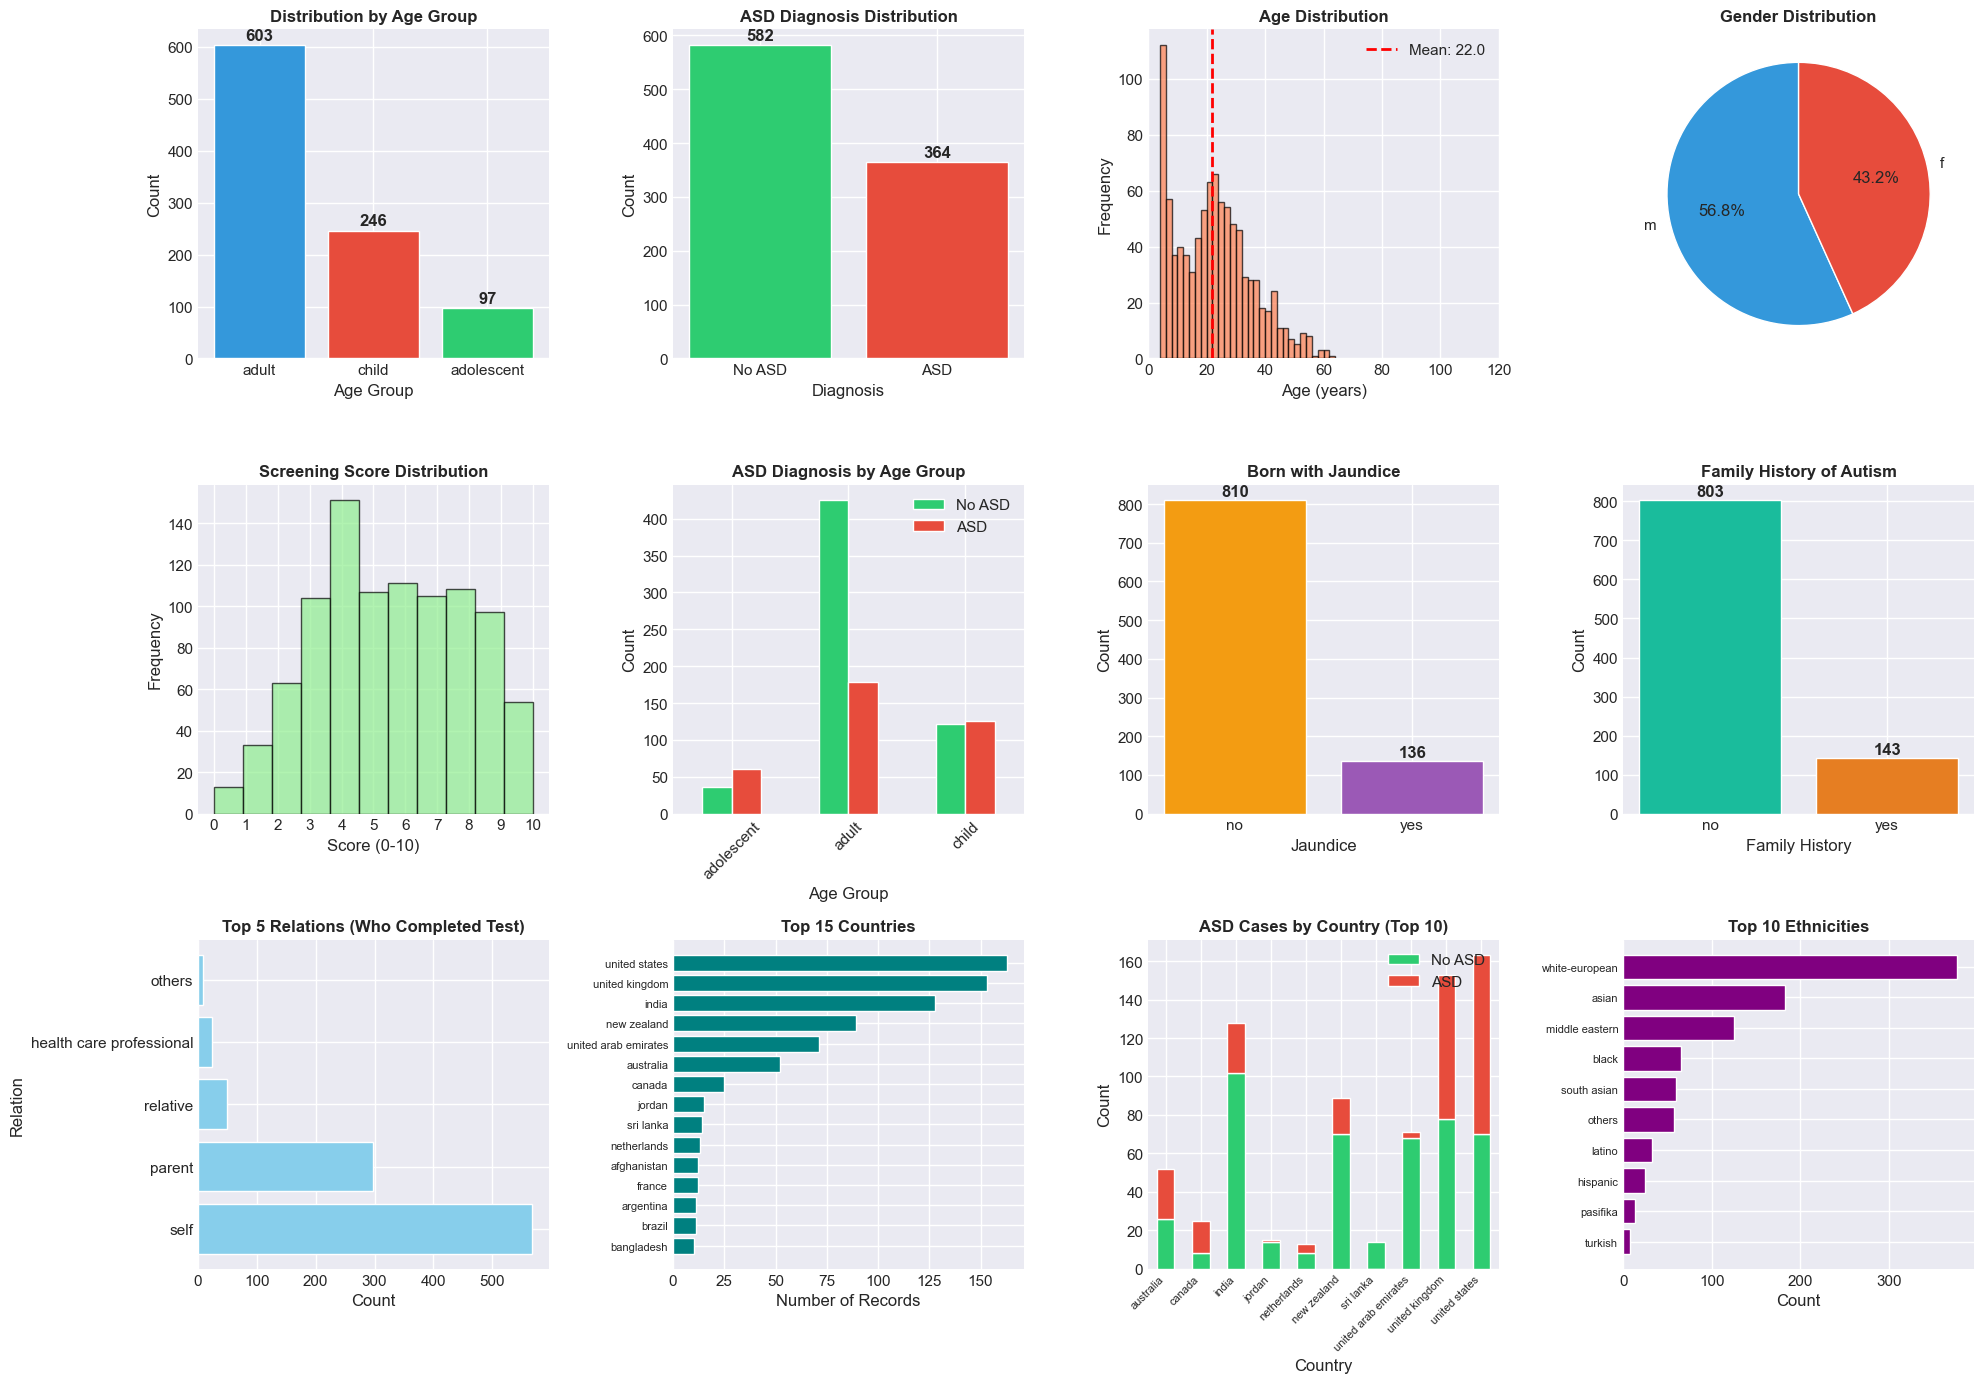

In [20]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure with subplots
fig = plt.figure(figsize=(20, 14))

# 1. Age group distribution
ax1 = plt.subplot(3, 4, 1)
age_group_counts = merged_df['age_group'].value_counts()
ax1.bar(age_group_counts.index, age_group_counts.values, color=['#3498db', '#e74c3c', '#2ecc71'])
ax1.set_title('Distribution by Age Group', fontsize=12, fontweight='bold')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
ax1.set_xticklabels(age_group_counts.index, rotation=0)
for i, v in enumerate(age_group_counts.values):
    ax1.text(i, v + 10, str(v), ha='center', fontweight='bold')

# 2. ASD diagnosis distribution
ax2 = plt.subplot(3, 4, 2)
target_col = [col for col in merged_df.columns if 'class' in col or 'asd' in col][0]
asd_counts = merged_df[target_col].value_counts()
ax2.bar(['No ASD', 'ASD'], asd_counts.values, color=['#2ecc71', '#e74c3c'])
ax2.set_title('ASD Diagnosis Distribution', fontsize=12, fontweight='bold')
ax2.set_xlabel('Diagnosis')
ax2.set_ylabel('Count')
for i, v in enumerate(asd_counts.values):
    ax2.text(i, v + 10, str(v), ha='center', fontweight='bold')

# 3. Age distribution
ax3 = plt.subplot(3, 4, 3)
ax3.hist(merged_df['age'], bins=30, color='coral', edgecolor='black', alpha=0.7)
ax3.set_title('Age Distribution', fontsize=12, fontweight='bold')
ax3.set_xlabel('Age (years)')
ax3.set_ylabel('Frequency')
ax3.set_xlim(0, 120)
ax3.axvline(merged_df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {merged_df["age"].mean():.1f}')
ax3.legend()

# 4. Gender distribution
ax4 = plt.subplot(3, 4, 4)
gender_counts = merged_df['gender'].value_counts()
ax4.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=['#3498db', '#e74c3c'], startangle=90)
ax4.set_title('Gender Distribution', fontsize=12, fontweight='bold')

# 5. Screening score distribution
ax5 = plt.subplot(3, 4, 5)
ax5.hist(merged_df['result'], bins=11, color='lightgreen', edgecolor='black', alpha=0.7)
ax5.set_title('Screening Score Distribution', fontsize=12, fontweight='bold')
ax5.set_xlabel('Score (0-10)')
ax5.set_ylabel('Frequency')
ax5.set_xticks(range(0, 11))

# 6. ASD by age group
ax6 = plt.subplot(3, 4, 6)
asd_by_age = pd.crosstab(merged_df['age_group'], merged_df[target_col])
asd_by_age.plot(kind='bar', stacked=False, ax=ax6, color=['#2ecc71', '#e74c3c'])
ax6.set_title('ASD Diagnosis by Age Group', fontsize=12, fontweight='bold')
ax6.set_xlabel('Age Group')
ax6.set_ylabel('Count')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45)
ax6.legend(['No ASD', 'ASD'], loc='upper right')

# 7. Jaundice distribution
ax7 = plt.subplot(3, 4, 7)
jaundice_counts = merged_df['jaundice'].value_counts()
ax7.bar(jaundice_counts.index, jaundice_counts.values, color=['#f39c12', '#9b59b6'])
ax7.set_title('Born with Jaundice', fontsize=12, fontweight='bold')
ax7.set_xlabel('Jaundice')
ax7.set_ylabel('Count')
for i, v in enumerate(jaundice_counts.values):
    ax7.text(i, v + 10, str(v), ha='center', fontweight='bold')

# 8. Family history of autism
ax8 = plt.subplot(3, 4, 8)
autism_family_counts = merged_df['autism'].value_counts()
ax8.bar(autism_family_counts.index, autism_family_counts.values, color=['#1abc9c', '#e67e22'])
ax8.set_title('Family History of Autism', fontsize=12, fontweight='bold')
ax8.set_xlabel('Family History')
ax8.set_ylabel('Count')
for i, v in enumerate(autism_family_counts.values):
    ax8.text(i, v + 10, str(v), ha='center', fontweight='bold')

# 9. Relation distribution
ax9 = plt.subplot(3, 4, 9)
relation_counts = merged_df['relation'].value_counts().head(5)
ax9.barh(relation_counts.index, relation_counts.values, color='skyblue')
ax9.set_title('Top 5 Relations (Who Completed Test)', fontsize=12, fontweight='bold')
ax9.set_xlabel('Count')
ax9.set_ylabel('Relation')

# 10. Top 15 Countries
ax10 = plt.subplot(3, 4, 10)
top_15_countries = merged_df['country'].value_counts().head(15)
ax10.barh(range(len(top_15_countries)), top_15_countries.values, color='teal')
ax10.set_yticks(range(len(top_15_countries)))
ax10.set_yticklabels(top_15_countries.index, fontsize=8)
ax10.set_title('Top 15 Countries', fontsize=12, fontweight='bold')
ax10.set_xlabel('Number of Records')
ax10.invert_yaxis()

# 11. ASD Cases by Top 10 Countries
ax11 = plt.subplot(3, 4, 11)
top_10_countries = merged_df['country'].value_counts().head(10).index
country_asd_data = merged_df[merged_df['country'].isin(top_10_countries)]
country_asd_crosstab = pd.crosstab(country_asd_data['country'], country_asd_data[target_col])
country_asd_crosstab.plot(kind='bar', stacked=True, ax=ax11, color=['#2ecc71', '#e74c3c'])
ax11.set_title('ASD Cases by Country (Top 10)', fontsize=12, fontweight='bold')
ax11.set_xlabel('Country')
ax11.set_ylabel('Count')
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=45, ha='right', fontsize=8)
ax11.legend(['No ASD', 'ASD'], loc='upper right')

# 12. Ethnicity distribution (top 10)
ax12 = plt.subplot(3, 4, 12)
ethnicity_counts = merged_df['ethnicity'].value_counts().head(10)
ax12.barh(range(len(ethnicity_counts)), ethnicity_counts.values, color='purple')
ax12.set_yticks(range(len(ethnicity_counts)))
ax12.set_yticklabels(ethnicity_counts.index, fontsize=8)
ax12.set_title('Top 10 Ethnicities', fontsize=12, fontweight='bold')
ax12.set_xlabel('Count')
ax12.invert_yaxis()

plt.tight_layout()

# Save figure
output_path = '../data/autism_screening_visualization.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"\nVisualization saved: {output_path}")
plt.show()

## **11. Save Cleaned Dataset**

In [21]:
# Save merged dataset directly in data folder
output_file = '../data/Autism_test_clean.csv'
merged_df.to_csv(output_file, index=False)
print(f"File saved successfully")
print(f"File details:")
print(f"  - Path: {output_file}")
print(f"  - Rows: {merged_df.shape[0]}")
print(f"  - Columns: {merged_df.shape[1]}")
print(f"  - File size: {os.path.getsize(output_file) / 1024:.2f} KB")

File saved successfully
File details:
  - Path: ../data/Autism_test_clean.csv
  - Rows: 946
  - Columns: 20
  - File size: 66.62 KB
